In [1]:
import numpy as np
import lib.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [2]:
def my_exp(x,y,w1,w2):
    if (w1 == 0):
        return np.exp( w2*1j*y)
    return np.exp(w1*1j*x + w2*1j*y)

In [220]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 2)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(1)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    plt.savefig('z-plot-ideal')

In [221]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, M)
    im = my_exp(x,y,i,j)
    h = 2*np.pi / 2**M
    grad_X, grad_Y = i * 1j * my_exp(x,y,i,j) * h, j * 1j * my_exp(x,y,i,j) * h
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = data.get_Poisson_noise(grad_X.real, photons) + 1j*data.get_Poisson_noise(grad_X.imag, photons)
        grad_Y = data.get_Poisson_noise(grad_Y.real, photons) + 1j*data.get_Poisson_noise(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [222]:
def calc_z_ideal (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                if (j*10 <= size):
                    z[i,j] = compare_ideal(i,j,M, noised,photons)
                else:
                    break
        else :
            break
    return z

In [230]:
z = calc_z_ideal(7, True, 1)

0


/home/satbek/Course-work-sem7/src/lib/data.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = photons / noised_image.max()
/home/satbek/Course-work-sem7/src/lib/data.py:45: RuntimeWarning: invalid value encountered in multiply
  noised_image = noised_image * scale_factor
/home/satbek/Course-work-sem7/src/lib/data.py:46: RuntimeWarning: invalid value encountered in less
  noised_image = np.random.poisson(noised_image)
/home/satbek/Course-work-sem7/src/lib/data.py:46: RuntimeWarning: invalid value encountered in greater
  noised_image = np.random.poisson(noised_image)


1
2
3
4
5
6
7
8
9
10
11
12
13


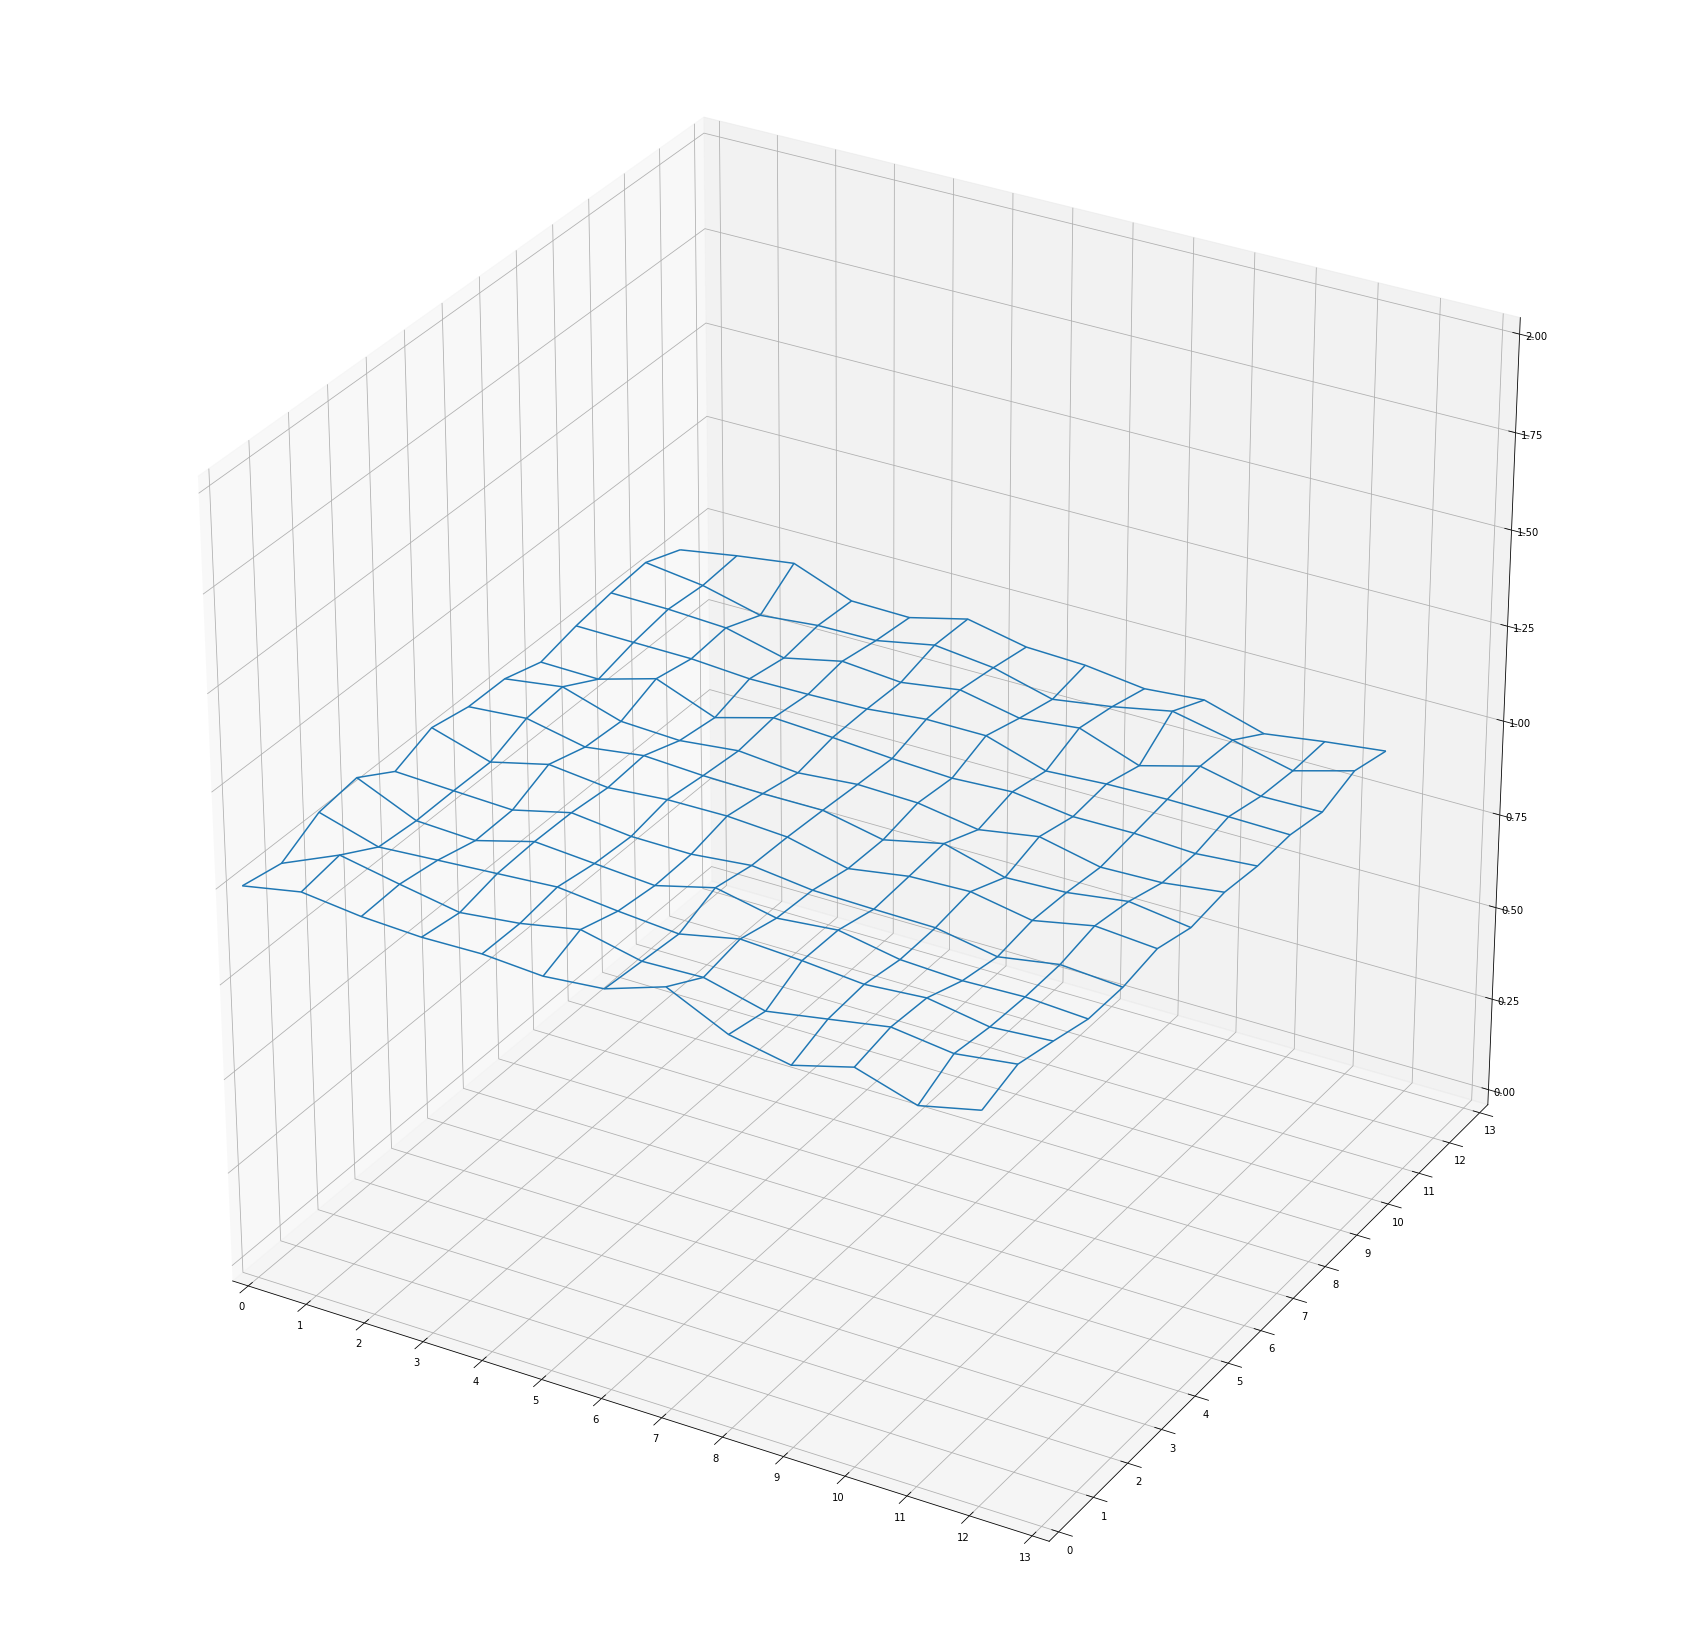

In [232]:
draw_plot(z[0:z.shape[0] // 10 + 1, 0:z.shape[0] // 10 + 1])

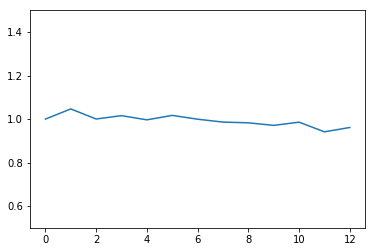

In [239]:
x = np.arange(z.shape[0] // 10 + 1)
y = [z[i,i] for i in range(z.shape[0] // 10 + 1)]
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.ylim(0.5,1.5)
plt.plot(x,y)

In [8]:
x,y = data.get_plane(-np.pi, np.pi, -np.pi, np.pi, 6)
im = my_exp(x,y,3,3)
grad_X, grad_Y = 3 * x * 1j * my_exp(x,y,3,3), 3 * y * 1j * my_exp(x,y,3,3)
LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
res = haar.syntesis({0:np.array([[np.mean(im)*2**6]])}, LH, HL, HH,6)
np.abs(np.fft.fft2(res[6])[3,3])

13907.892690715842

In [9]:
np.abs(np.fft.fft2(im)[3,3])

4065.5422034138596

In [162]:
x, y = data.get_plane(-252,251,-252,251,9)
z = my_exp(x,y,2,2)

In [163]:
z_x = 2j * my_exp(x,y,1,1)

In [164]:
gr_x = grad.Hudgin_gradien_model(z)

In [176]:
gr_x[0]

array([[ 0.71189219+0.62160355j, -0.12377174+0.93694291j,
        -0.84888505+0.41542224j, ...,  0.58322849-0.74365717j,
         0.94216315+0.07422976j, -0.54030231+0.84147098j],
       [-0.12377174+0.93694291j, -0.84888505+0.41542224j,
        -0.81578997-0.47714588j, ...,  0.94216315+0.07422976j,
         0.45957515+0.82581605j, -0.99987745+0.01565494j],
       [-0.84888505+0.41542224j, -0.81578997-0.47714588j,
        -0.05404641-0.94353614j, ...,  0.45957515+0.82581605j,
        -0.43349686+0.83979875j, -0.5663806 -0.82414381j],
       ...,
       [ 0.58322849-0.74365717j,  0.94216315+0.07422976j,
         0.45957515+0.82581605j, ..., -0.77335593-0.54323297j,
         0.02448154-0.94476564j,  0.86877197+0.49521234j],
       [ 0.94216315+0.07422976j,  0.45957515+0.82581605j,
        -0.43349686+0.83979875j, ...,  0.02448154-0.94476564j,
         0.80045256-0.50245115j,  0.06831941+0.9976635j ],
       [ 0.45957515+0.82581605j, -0.43349686+0.83979875j,
        -0.93937751+0.10368878

In [177]:
gr_abs = np.abs(np.fft.fft(gr_x[0][0]))

In [178]:
z_x_abs = np.abs(np.fft.fft(z_x[0]))

ValueError: x and y must have same first dimension, but have shapes (1,) and (512,)

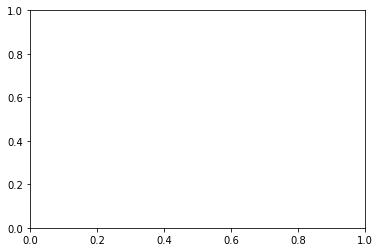

In [179]:
plt.plot(x[0], gr_abs/z_x_abs)

In [ ]:
gr_abs/z_x_abs

In [ ]:
z_x_abs/gr_abs

In [148]:
gr_abs

array([1.        , 5.8349895 , 3.57555439, 2.09888177, 1.66274427,
       1.41118454, 1.20896148, 1.01557731])

In [149]:
z_x_abs

array([1.57856108, 7.06663745, 2.68808608, 1.20642051, 0.86237185,
       0.76118021, 0.78870594, 0.97179486])